# **MÓDULO 34 - Regressão: Conceitos Avançados**

Para essa atividade vocês trabalharão com a mesma base que usamos na aula, para previsão do aluguel.

Durante a aula montamos um modelo de regressão polinomial utilizando a variavel Valor Condominio para prever a variavel valor aluguel. Nessa atividade vocês devem escolher outra váriavel dessa base para realizar a previsão do valor do aluguel.


# 1 - Realize a importação das bibliotecas necessárias, carrega a base de dados e separe em X e Y, selecionando uma das váriaveis para X não sendo a usada durante a aula.

In [6]:
#seu código aqui
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

df=pd.read_csv('ALUGUEL_MOD12-M34.csv', delimiter=';')
df.head(11)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


In [7]:
y = df['Valor_Aluguel']      #separando as variaveis
x = df[['Metragem']]


# 2 - Faça o procecssamento dos dados utilizando o Polynomial Feature, com degree = 2.

In [9]:
#seu código aqui
regressao_poly = PolynomialFeatures(degree=2)         #fazendo o pre-processamento polinomial
x_poly = regressao_poly.fit_transform(x)


# 3 - Separe os dados em treino e teste e realize o treinamento do modelo.

In [11]:
#seu código aqui                  #separando em treino e teste e treinando o modelo
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=0)
regressao_linear = LinearRegression()
regressao_linear.fit(x_train, y_train)


LinearRegression()

4 - Faça as previsões para a base de teste e avalie os resultados obtidos, não se esqueça de plotar o gráfico da regressão.

In [13]:
#seu código aqui
print(x_test.shape, y_test.shape)        #verificando linhas e colunas

(1441, 3) (1441,)


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


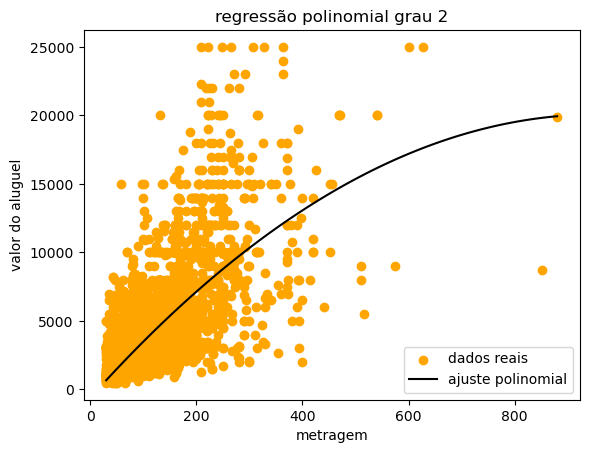

In [14]:
y_pred = regressao_linear.predict(x_test)           #plotando o gráfico com a regressão polinomial em grau 2

x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
x_range_poly = regressao_poly.transform(x_range)
y_range_pred = regressao_linear.predict(x_range_poly)

plt.scatter(x, y, color='orange', label='dados reais')
plt.plot(x_range, y_range_pred, color='black', label='ajuste polinomial')
plt.xlabel('metragem')
plt.ylabel('valor do aluguel')
plt.title('regressão polinomial grau 2')
plt.legend()
plt.show()

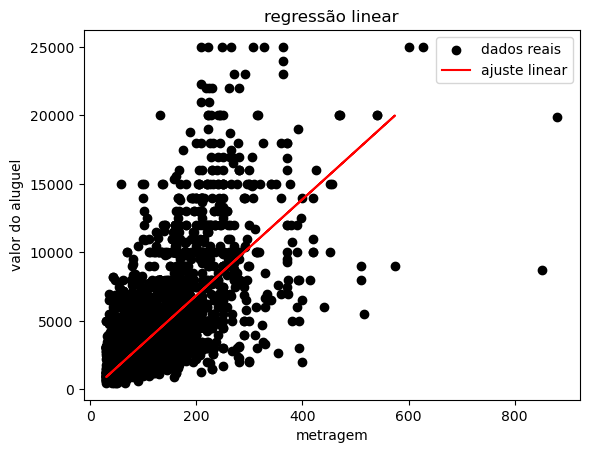

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)   #plotando o gráfico com a regressão linear
regressao_linear = LinearRegression()
regressao_linear.fit(x_train, y_train)

y_linear = regressao_linear.predict(x_test)

plt.scatter(x, y, color='black', label='dados reais')
plt.plot(x_test, y_linear, color='red', label='ajuste linear')
plt.xlabel('metragem')
plt.ylabel('valor do aluguel')
plt.title('regressão linear')
plt.legend()
plt.show()

In [16]:
r2_linear = r2_score(y_test, y_linear)    #mostrando a pontuação R2 linear
print(f'{r2_linear:.4f}')

0.5349


In [17]:
r2_poly = r2_score(y_test, y_pred)       #mostrando a pontuação R2 polinomial
print(f'{r2_poly:.4f}')

0.5423


Comparando os resultados obtidos, a regressão polinomial se mostrou ser um pouco melhor do que a regressão linear usando um pre-processamento de grau 2, ela teve uma pontuação R2 de 0.54 contra 0.53 da linear

# 5 - Refaça os passos anteriores, rodando um novo modelo, porém testando agora na fase de processamento o degree = 4. Avalie se o resultado desse novo modelo está superior ao anterior.

In [20]:
y_4 = df['Valor_Aluguel']      #separando as variaveis
x_4 = df[['Metragem']]

regressao_poly_4 = PolynomialFeatures(degree=4)         #fazendo o pre-processamento polinomial
x_poly_4 = regressao_poly_4.fit_transform(x)

In [21]:
#seu código aqui                                       #separando em treino e teste e treinando o modelo
x_train_4, x_test_4, y_train_4, y_test_4 = train_test_split(x_poly_4, y_4, test_size=0.2, random_state=0)
regressao_linear_4 = LinearRegression()
regressao_linear_4.fit(x_train_4, y_train_4)


LinearRegression()

In [22]:
print(x_test_4.shape, y_test_4.shape)     #verificando linhas e colunas

(1441, 5) (1441,)


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


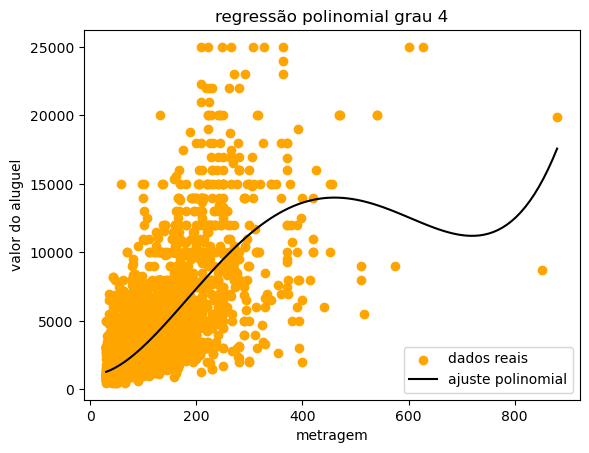

In [23]:
y_pred_4 = regressao_linear_4.predict(x_test_4)           #plotando o gráfico com a regressão polinomial em grau 4

x_range_4 = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
x_range_poly_4 = regressao_poly_4.transform(x_range_4)
y_range_pred_4 = regressao_linear_4.predict(x_range_poly_4)

plt.scatter(x_4, y_4, color='orange', label='dados reais')
plt.plot(x_range_4, y_range_pred_4, color='black', label='ajuste polinomial')
plt.xlabel('metragem')
plt.ylabel('valor do aluguel')
plt.title('regressão polinomial grau 4')
plt.legend()
plt.show()

In [24]:
r2_poly_grau2 = r2_score(y_test, y_pred)       #mostrando a pontuação R2 polinomial
print(f'{r2_poly_grau2:.4f}')

0.5423


In [25]:
r2_poly_grau4 = r2_score(y_test_4, y_pred_4)       #mostrando a pontuação R2 polinomial
print(f'{r2_poly_grau4:.4f}')

0.5596


Comparando os resultados da regressão linear e polinomial de grau 2 e grau 4, a regressão de grau 4 teve uma performace melhor com uma pontuação R2 de 0.55 contra 0.54 na grau 2 e 0.53 na linear

# 6 - Explique com suas palavras o conceito e a diferença entre Elastic Net, Ridge e Lasso.
Minimo: 4 linhas.

R - Esses 3 tipos de regressão adicionam uma penalidade aos coeficientes do modelo, mas a diferença entra elas esta na forma como essa penalidade é aplicada, a regressão Lasso adiciona uma penalidade L1 reduzindo alguns coeficientes a zero, eliminando algumas variaveis do modelo, na regressão Ridge ela adiciona uma penalidade L2 reduzindo alguns coeficientes mas sem zera-los completamente como acontece na regressão Lasso, isso pode ser útil pois ajuda a evitar o overfitting e na regressão Elastic net ela adiciona uma penalidade L1 e L2 combinando a regressão Lasso e Ridge em uma só, ela pode ser útil quando tem muitas variáveis correlacionadas e queremos um meio-termo entre a Lasso e a Ridge.